In [1]:
#importing library
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab.patches import cv2_imshow

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


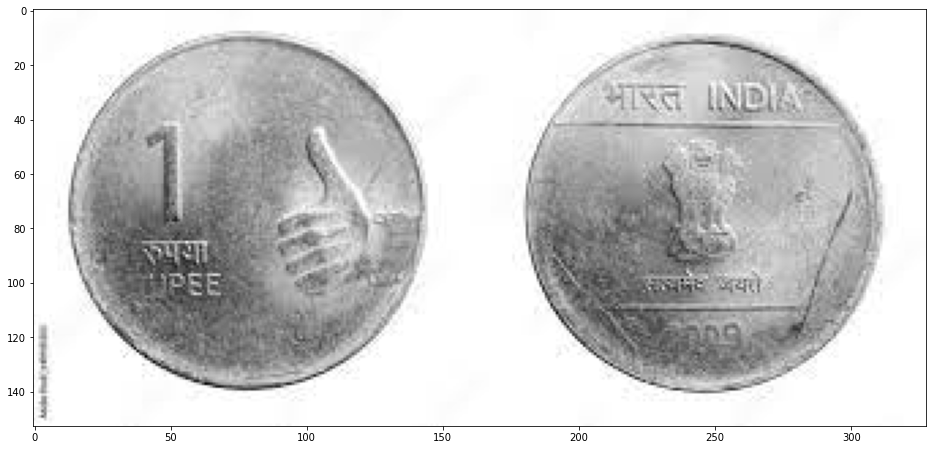

In [5]:
#Load image
image=r'/coin.jpg'
img=cv2.imread(image,1)
img_org= img.copy()
#Converting the image to grayscale because function in opencv houghcircle requires grayscale
img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.rcParams["figure.figsize"]=(16,9)
plt.imshow(img,cmap='gray')


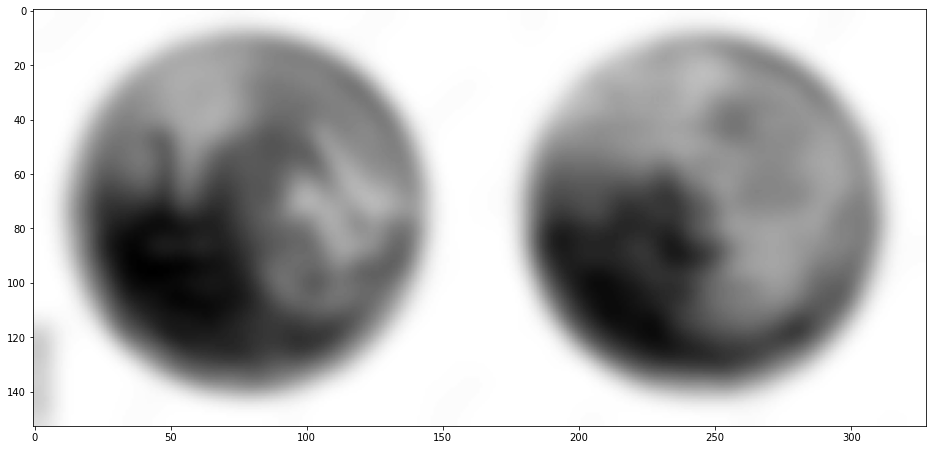

In [6]:
#Blur image because houghcircle works better in blurred image
img=cv2.GaussianBlur(img,(21,21),cv2.BORDER_DEFAULT)
plt.rcParams["figure.figsize"]=(16,9)
plt.imshow(img, cmap='gray')

In [7]:
#Using houghcircle function to detect circles in the image
all_circs= cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,param1=50,param2=30,minRadius=60,maxRadius=0)
detected_circles_rounded = np.uint16(np.around(all_circs))

In [8]:
print(detected_circles_rounded)
print(detected_circles_rounded.shape)
print("I have found"+ str(detected_circles_rounded.shape[1]) + 'coins.')

[[[244  74  66]
  [ 76  74  66]]]
(1, 2, 3)
I have found2coins.


In [9]:
count=1
for i in detected_circles_rounded[0,:]:
  cv2.circle(img_org,(i[0],i[1]),i[2],(50,200,200),5)
  cv2.circle(img_org,(i[0],i[1]),2,(255,0,0),3)
  cv2.putText(img_org,"coin"+str(count),(i[0]-70,i[1]+30),cv2.FONT_HERSHEY_SIMPLEX,1.1,(255,0,0),2)
  count+=1

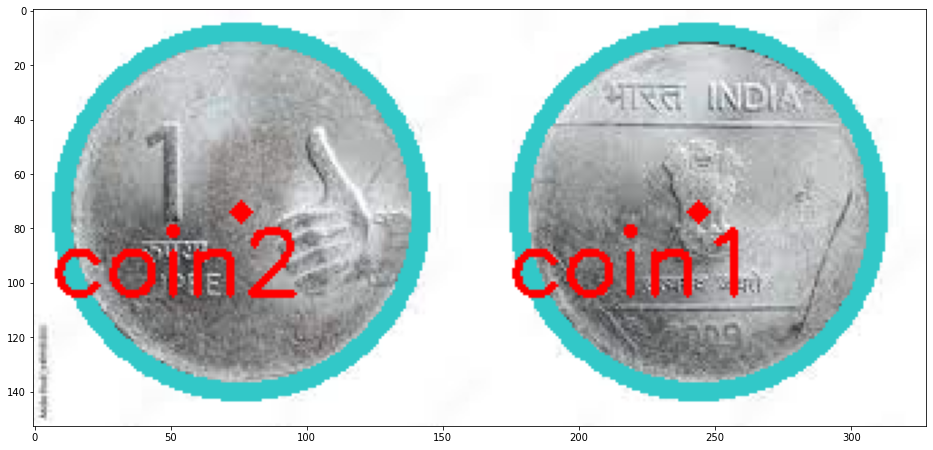

In [10]:
plt.rcParams["figure.figsize"]=(16,9)
plt.imshow(img_org)